# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import re
import string
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
from datetime import datetime, timedelta

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erikl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

In [4]:
type(api_key)

str

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)

In [6]:
type(newsapi)

newsapi.newsapi_client.NewsApiClient

In [7]:
newsapi

In [8]:
# Find the Current Date Time
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
print(current_date)

2021-09-27T06:24:41.695169-04:00


In [9]:
# Find the Past Date from 24 hours ago
past24hr_date = pd.Timestamp(datetime.now() - timedelta(hours=24), tz="America/New_York").isoformat()
print(past24hr_date)

2021-09-26T06:24:44.101591-04:00


In [10]:
# Checking for the correct datetime format:
test_date = datetime.strptime(current_date[:19], "%Y-%m-%dT%H:%M:%S")
print(test_date)

2021-09-27 06:24:41


In [11]:
# Create a Function for Fetching News:
def get_articles(keyword):
    all_headlines = []
    all_datetime=[]
    all_descriptions=[]
    all_urls=[]
    all_content=[]
    date = datetime.strptime(current_date[:19], "%Y-%m-%dT%H:%M:%S")
    end_date = datetime.strptime(past24hr_date[:19], "%Y-%m-%dT%H:%M:%S")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    if date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(end_date),
            to=str(date),
            language="en",
#             page_size=100,
            sort_by="relevancy",
            page=1,
            )
#         headlines=[]
        for i in range(0, len(articles["articles"])):
            all_headlines.append(articles["articles"][i]["title"])
            all_datetime.append(articles["articles"][i]["publishedAt"])
            all_descriptions.append(articles["articles"][i]["description"])
            all_urls.append(articles["articles"][i]["url"])
            all_content.append(articles["articles"][i]["content"])
    
    article_df = pd.concat([pd.Series(all_headlines), pd.Series(all_datetime), pd.Series(all_urls), pd.Series(all_descriptions), pd.Series(all_content)], axis=1)
    article_df.rename({0:'Headlines', 1:'Date_Time', 2:'URL', 3:'Description', 4:'Content'}, axis=1, inplace=True)
    return article_df

## Analyzing Bitcoin Sentiment:

In [12]:
# Fetch the Bitcoin news articles
# btc_articles_df = get_articles("bitcoin")

In [13]:
btc_articles_df = pd.read_csv('btc_articles_df_2021-09-26.csv', index_col=False)

In [14]:
btc_articles_df.shape

(20, 9)

In [16]:
btc_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,Hitting the Books: How Bitcoin is somehow wort...,2021-09-25T15:30:24Z,https://www.engadget.com/hitting-the-books-the...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,0.3400,0.058,0.942,0.000
1,"26,000 and Counting: America is Installing Hun...",2021-09-26T03:34:00Z,https://news.slashdot.org/story/21/09/26/02520...,The cryptocurrency-ATM company Coinmover has o...,The cryptocurrency-ATM company Coinmover has o...,0.0000,0.000,1.000,0.000
2,VoIP.ms Battles Week-Long Sustained DDoS-for-R...,2021-09-26T01:34:00Z,https://tech.slashdot.org/story/21/09/26/00142...,"Slashdot reader Striek writes: VoIP.ms, a Cana...","VoIP.ms, a Canadian VoIP provider [also servin...",-0.8176,0.000,0.813,0.187
3,Cryptocurrency exchange Huobi to clean up exis...,2021-09-26T09:23:00Z,https://www.reuters.com/world/china/cryptocurr...,Chinese cryptocurrency exchange Huobi Global s...,A Chinese flag is seen among representations o...,-0.2263,0.000,0.947,0.053
4,"110,000 Affected by Epik Breach - Including Th...",2021-09-25T22:34:00Z,https://yro.slashdot.org/story/21/09/25/153423...,Epik's massive data breach is already affectin...,Epik's massive data breach is already affectin...,0.6361,0.095,0.905,0.000


In [17]:
btc_articles_df.loc[0]['Content']

'Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn … [+8436 chars]'

In [18]:
btc_articles_df.loc[0]['Description']

'Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn of the century. Unlike gold, which derives its value from bo…'

In [19]:
btc_articles_df.loc[0]['Headlines']

"Hitting the Books: How Bitcoin is somehow worth more than the paper it's printed on"

In [20]:
btc_articles_df.loc[3]['Content']

'A Chinese flag is seen among representations of Bitcoin and other cryptocurrencies in this illustration picture taken June 2, 2021. REUTERS/Florence Lo/Illustration/File PhotoBEIJING, Sept 26 (Reuter… [+726 chars]'

In [21]:
btc_articles_df.loc[3]['Description']

'Chinese cryptocurrency exchange Huobi Global said on Sunday it had stopped taking new mainland customers from Friday and would end contracts with mainland clients by the end of the year to comply with local regulations.'

In [22]:
btc_articles_df.loc[3]['Headlines']

'Cryptocurrency exchange Huobi to clean up existing mainland clients by end-2021 - Reuters'

### Clean the Text:

In [23]:
def clean_text(text):
#     regex = re.compile('[%s]' % re.escape(string.punctuation))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    return re_clean

In [24]:
test_clean = clean_text(btc_articles_df.loc[3]['Description'])

In [25]:
type(test_clean)

str

In [26]:
test_clean

'Chinese cryptocurrency exchange Huobi Global said on Sunday it had stopped taking new mainland customers from Friday and would end contracts with mainland clients by the end of the year to comply with local regulations'

In [27]:
# Lambda function of "clean_text()" for use with apply
text_cleaner = lambda x: clean_text(x)

In [28]:
# Review updated text:
btc_clean = pd.DataFrame(btc_articles_df['Description'].apply(text_cleaner))
btc_clean

,Description
0,Bitcoin and similar blockchainbased cryptos ex...
1,The cryptocurrencyATM company Coinmover has ov...
2,Slashdot reader Striek writes VoIPms a Canadia...
3,Chinese cryptocurrency exchange Huobi Global s...
4,Epiks massive data breach is already affecting...
5,Financial insecurity is influencing young inve...
6,Ahead of Chinas latest bitcoin and crypto crac...
7,After three years together as well as having a...
8,A move by Chinas central bank to criminalize a...
9,By integrating direct bitcoin payments Twitter...


In [29]:
# Function to get compound sentiments
def get_compound_sentiment(content):
    sentiment = analyzer.polarity_scores(content)
    compound = sentiment["compound"]
    return compound
get_compoundScore = lambda x: get_compound_sentiment(x)

In [30]:
btc_articles_df['Compound Sentiment'] = btc_articles_df['Description'].apply(get_compoundScore)
btc_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,Hitting the Books: How Bitcoin is somehow wort...,2021-09-25T15:30:24Z,https://www.engadget.com/hitting-the-books-the...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,0.3400,0.058,0.942,0.000
1,"26,000 and Counting: America is Installing Hun...",2021-09-26T03:34:00Z,https://news.slashdot.org/story/21/09/26/02520...,The cryptocurrency-ATM company Coinmover has o...,The cryptocurrency-ATM company Coinmover has o...,0.0000,0.000,1.000,0.000
2,VoIP.ms Battles Week-Long Sustained DDoS-for-R...,2021-09-26T01:34:00Z,https://tech.slashdot.org/story/21/09/26/00142...,"Slashdot reader Striek writes: VoIP.ms, a Cana...","VoIP.ms, a Canadian VoIP provider [also servin...",-0.8176,0.000,0.813,0.187
3,Cryptocurrency exchange Huobi to clean up exis...,2021-09-26T09:23:00Z,https://www.reuters.com/world/china/cryptocurr...,Chinese cryptocurrency exchange Huobi Global s...,A Chinese flag is seen among representations o...,-0.2263,0.000,0.947,0.053
4,"110,000 Affected by Epik Breach - Including Th...",2021-09-25T22:34:00Z,https://yro.slashdot.org/story/21/09/25/153423...,Epik's massive data breach is already affectin...,Epik's massive data breach is already affectin...,0.6361,0.095,0.905,0.000


In [31]:
# Function to get positive sentiments
def get_positive_sentiment(content):
    sentiment = analyzer.polarity_scores(content)
    positive = sentiment["pos"]
    return positive
get_positiveScore = lambda x: get_positive_sentiment(x)

In [32]:
btc_articles_df['Positive Sentiment'] = btc_articles_df['Description'].apply(get_positiveScore)
btc_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,Hitting the Books: How Bitcoin is somehow wort...,2021-09-25T15:30:24Z,https://www.engadget.com/hitting-the-books-the...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,0.3400,0.058,0.942,0.000
1,"26,000 and Counting: America is Installing Hun...",2021-09-26T03:34:00Z,https://news.slashdot.org/story/21/09/26/02520...,The cryptocurrency-ATM company Coinmover has o...,The cryptocurrency-ATM company Coinmover has o...,0.0000,0.000,1.000,0.000
2,VoIP.ms Battles Week-Long Sustained DDoS-for-R...,2021-09-26T01:34:00Z,https://tech.slashdot.org/story/21/09/26/00142...,"Slashdot reader Striek writes: VoIP.ms, a Cana...","VoIP.ms, a Canadian VoIP provider [also servin...",-0.8176,0.000,0.813,0.187
3,Cryptocurrency exchange Huobi to clean up exis...,2021-09-26T09:23:00Z,https://www.reuters.com/world/china/cryptocurr...,Chinese cryptocurrency exchange Huobi Global s...,A Chinese flag is seen among representations o...,-0.2263,0.000,0.947,0.053
4,"110,000 Affected by Epik Breach - Including Th...",2021-09-25T22:34:00Z,https://yro.slashdot.org/story/21/09/25/153423...,Epik's massive data breach is already affectin...,Epik's massive data breach is already affectin...,0.6361,0.095,0.905,0.000


In [33]:
# Function to get neutral sentiments
def get_neutral_sentiment(content):
    sentiment = analyzer.polarity_scores(content)
    neutral = sentiment["neu"]
    return neutral
get_neutralScore = lambda x: get_neutral_sentiment(x)

In [34]:
btc_articles_df['Neutral Sentiment'] = btc_articles_df['Description'].apply(get_neutralScore)
btc_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,Hitting the Books: How Bitcoin is somehow wort...,2021-09-25T15:30:24Z,https://www.engadget.com/hitting-the-books-the...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,0.3400,0.058,0.942,0.000
1,"26,000 and Counting: America is Installing Hun...",2021-09-26T03:34:00Z,https://news.slashdot.org/story/21/09/26/02520...,The cryptocurrency-ATM company Coinmover has o...,The cryptocurrency-ATM company Coinmover has o...,0.0000,0.000,1.000,0.000
2,VoIP.ms Battles Week-Long Sustained DDoS-for-R...,2021-09-26T01:34:00Z,https://tech.slashdot.org/story/21/09/26/00142...,"Slashdot reader Striek writes: VoIP.ms, a Cana...","VoIP.ms, a Canadian VoIP provider [also servin...",-0.8176,0.000,0.813,0.187
3,Cryptocurrency exchange Huobi to clean up exis...,2021-09-26T09:23:00Z,https://www.reuters.com/world/china/cryptocurr...,Chinese cryptocurrency exchange Huobi Global s...,A Chinese flag is seen among representations o...,-0.2263,0.000,0.947,0.053
4,"110,000 Affected by Epik Breach - Including Th...",2021-09-25T22:34:00Z,https://yro.slashdot.org/story/21/09/25/153423...,Epik's massive data breach is already affectin...,Epik's massive data breach is already affectin...,0.6361,0.095,0.905,0.000


In [35]:
# Function to get negative sentiments
def get_negative_sentiment(content):
    sentiment = analyzer.polarity_scores(content)
    negative = sentiment["neg"]
    return negative
get_negativeScore = lambda x: get_negative_sentiment(x)

In [36]:
btc_articles_df['Negative Sentiment'] = btc_articles_df['Description'].apply(get_negativeScore)
btc_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,Hitting the Books: How Bitcoin is somehow wort...,2021-09-25T15:30:24Z,https://www.engadget.com/hitting-the-books-the...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,0.3400,0.058,0.942,0.000
1,"26,000 and Counting: America is Installing Hun...",2021-09-26T03:34:00Z,https://news.slashdot.org/story/21/09/26/02520...,The cryptocurrency-ATM company Coinmover has o...,The cryptocurrency-ATM company Coinmover has o...,0.0000,0.000,1.000,0.000
2,VoIP.ms Battles Week-Long Sustained DDoS-for-R...,2021-09-26T01:34:00Z,https://tech.slashdot.org/story/21/09/26/00142...,"Slashdot reader Striek writes: VoIP.ms, a Cana...","VoIP.ms, a Canadian VoIP provider [also servin...",-0.8176,0.000,0.813,0.187
3,Cryptocurrency exchange Huobi to clean up exis...,2021-09-26T09:23:00Z,https://www.reuters.com/world/china/cryptocurr...,Chinese cryptocurrency exchange Huobi Global s...,A Chinese flag is seen among representations o...,-0.2263,0.000,0.947,0.053
4,"110,000 Affected by Epik Breach - Including Th...",2021-09-25T22:34:00Z,https://yro.slashdot.org/story/21/09/25/153423...,Epik's massive data breach is already affectin...,Epik's massive data breach is already affectin...,0.6361,0.095,0.905,0.000


In [37]:
# # Save BTC Articles data to CSV:
# btc_articles_df.to_csv(f"btc_articles_df_{current_date[:10]}.csv", index=False)

## Ethereum Sentiment Analysis

In [38]:
# Fetch the Ethereum news articles
# eth_articles_df = get_articles("ethereum")

In [39]:
eth_articles_df = pd.read_csv('eth_articles_df_2021-09-26.csv', index_col=False)

In [40]:
eth_articles_df.shape

(20, 9)

In [41]:
eth_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,JPMorgan Warns Big Investors Are Suddenly Dump...,2021-09-26T10:15:44Z,https://www.forbes.com/sites/billybambrough/20...,Ahead of China's latest bitcoin and crypto cra...,Bitcoin and cryptocurrency prices have fallen ...,-0.2732,0.000,0.928,0.072
1,"Amid China's crackdown on crypto, here's how t...",2021-09-26T05:45:20Z,https://economictimes.indiatimes.com/markets/c...,"This month we had some good news too for BTC, ...","Bitcoin, the largest cryptocurrency, started i...",0.8591,0.208,0.792,0.000
2,3 NFT Stocks With High Growth Potential,2021-09-25T13:30:00Z,https://www.fool.com/investing/2021/09/25/3-nf...,The non-fungible token market is booming and t...,The market for non-fungible tokens -- digital ...,0.3400,0.146,0.854,0.000
3,Bitcoin mining company buys Pennsylvania power...,2021-09-26T12:41:00Z,https://www.techspot.com/news/91430-bitcoin-mi...,Mining the top cryptocurrencies such as Bitcoi...,What just happened? Crypto mining companies ar...,0.2023,0.044,0.956,0.000
4,TikTok shows Gen Z how to buy bitcoin and cryp...,2021-09-26T10:40:10Z,https://www.usatoday.com/story/news/2021/09/26...,Financial insecurity is influencing young inve...,On today's episode of 5 Things: Gen Zers and m...,-0.5994,0.000,0.786,0.214


In [42]:
eth_articles_df.loc[0]['Content']

"Bitcoin and cryptocurrency prices have fallen sharply through September, proving bears right.\r\nSubscribe now to Forbes' CryptoAsset &amp; Blockchain Advisor and discover hot new NFT and crypto blockb… [+3604 chars]"

In [43]:
eth_articles_df.loc[0]['Description']

"Ahead of China's latest bitcoin and crypto crackdown, analysts at Wall Street giant JPMorgan\ufeff have warned big investors have begun pivoting out of bitcoin futures and into ethereum..."

### Clean the Text

In [44]:
# Using functions created for Cleaning BTC text:
eth_clean = pd.DataFrame(eth_articles_df['Description'].apply(text_cleaner))
eth_clean

,Description
0,Ahead of Chinas latest bitcoin and crypto crac...
1,This month we had some good news too for BTC E...
2,The nonfungible token market is booming and th...
3,Mining the top cryptocurrencies such as Bitcoi...
4,Financial insecurity is influencing young inve...
5,olliWhy Bitcoin Ethereum And Dogecoin Could Be...
6,olliDogecoin Bitcoin Ethereum See Buying Oppor...
7,An NFT avatar has signed with global talent ag...
8,SOLs futures open interest recently hit billi...
9,With the Coinbase CEO ready to take on the Sec...


## Create the Ethereum sentiment scores DataFrame

In [45]:
# Function to get compound sentiments
eth_articles_df['Compound Sentiment'] = eth_articles_df['Description'].apply(get_compoundScore)
eth_articles_df['Positive Sentiment'] = eth_articles_df['Description'].apply(get_positiveScore)
eth_articles_df['Neutral Sentiment'] = eth_articles_df['Description'].apply(get_neutralScore)
eth_articles_df['Negative Sentiment'] = eth_articles_df['Description'].apply(get_negativeScore)
eth_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,JPMorgan Warns Big Investors Are Suddenly Dump...,2021-09-26T10:15:44Z,https://www.forbes.com/sites/billybambrough/20...,Ahead of China's latest bitcoin and crypto cra...,Bitcoin and cryptocurrency prices have fallen ...,-0.2732,0.000,0.928,0.072
1,"Amid China's crackdown on crypto, here's how t...",2021-09-26T05:45:20Z,https://economictimes.indiatimes.com/markets/c...,"This month we had some good news too for BTC, ...","Bitcoin, the largest cryptocurrency, started i...",0.8591,0.208,0.792,0.000
2,3 NFT Stocks With High Growth Potential,2021-09-25T13:30:00Z,https://www.fool.com/investing/2021/09/25/3-nf...,The non-fungible token market is booming and t...,The market for non-fungible tokens -- digital ...,0.3400,0.146,0.854,0.000
3,Bitcoin mining company buys Pennsylvania power...,2021-09-26T12:41:00Z,https://www.techspot.com/news/91430-bitcoin-mi...,Mining the top cryptocurrencies such as Bitcoi...,What just happened? Crypto mining companies ar...,0.2023,0.044,0.956,0.000
4,TikTok shows Gen Z how to buy bitcoin and cryp...,2021-09-26T10:40:10Z,https://www.usatoday.com/story/news/2021/09/26...,Financial insecurity is influencing young inve...,On today's episode of 5 Things: Gen Zers and m...,-0.5994,0.000,0.786,0.214


In [46]:
# # Save ETH Articles data to CSV:
# eth_articles_df.to_csv(f"eth_articles_df_{current_date[:10]}.csv", index=False)

In [47]:
# Describe the Bitcoin Sentiment
btc_articles_df.describe()

,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
count,20.000000,20.000000,20.000000,20.000000
mean,-0.005710,0.043100,0.909300,0.047600
std,0.415840,0.061223,0.089798,0.070477
min,-0.817600,0.000000,0.695000,0.000000
25%,-0.295200,0.000000,0.882000,0.000000
50%,0.000000,0.000000,0.928500,0.000000
75%,0.236725,0.074000,0.979750,0.083250
max,0.859100,0.208000,1.000000,0.214000


In [48]:
# Describe the Ethereum Sentiment
eth_articles_df.describe()

,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
count,20.000000,20.000000,20.000000,20.000000
mean,0.272145,0.100650,0.865100,0.034250
std,0.487434,0.094671,0.086856,0.054343
min,-0.599400,0.000000,0.689000,0.000000
25%,-0.255800,0.000000,0.813000,0.000000
50%,0.370950,0.110000,0.858500,0.000000
75%,0.675150,0.165750,0.940000,0.056750
max,0.930000,0.311000,1.000000,0.214000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum with 0.100650

Q: Which coin had the highest compound score?

A: Ethereum with 0.930000

Q. Which coin had the highest positive score?

A: Ethereum with 0.311000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [49]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [50]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
additional_stopWords = ["'", 'li', '``', '/li', 'ol', '/ol', '<','>','<ol>','</ol>', "<li>", '</li>', '-', "'re", "'s",'...']

# Expand the default stopwords list if necessary
sw = set(additional_stopWords + stopwords.words('english'))

In [51]:
print(sw)

{'out', 'ma', 'between', 'they', 'wasn', 'nor', "'s", "haven't", 'as', 'by', 'doesn', 'couldn', 'doing', 'shan', 'down', 'no', 'what', "shan't", 'during', 'mightn', '/li', 'be', 'themselves', 'while', 'at', "'re", 'own', 'so', 'will', 'aren', "needn't", 'which', 'to', 'was', 'y', 'am', 'below', 'above', "couldn't", 'you', "she's", 'off', 'with', 'don', "wouldn't", 'me', 'my', 'all', 'most', 'very', "hadn't", 'but', 'having', 'through', 'is', 'too', 'again', '</li>', 'them', 'if', 'after', 'm', 'before', '</ol>', 's', 'haven', "it's", 'the', '<ol>', 'there', 'on', '>', 'yourselves', 'those', 'of', 'didn', "don't", "doesn't", 'some', "you've", 'li', 'he', 'theirs', 'its', 'over', 'this', 'any', 'not', 'should', "you'd", 'where', 'few', 'until', "won't", 'did', 'does', 'i', 'needn', 't', 'wouldn', '<li>', 'him', 'won', 'had', 'because', 'his', "that'll", "'", 'ain', 'for', 'isn', 'do', 'she', 'itself', 'that', 'shouldn', 'are', 'more', 'yours', 'against', '``', 'whom', 'our', '-', 'why', 

In [52]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [53]:
# Create a new tokens column for Bitcoin

In [54]:
btc_articles_df['Tokens'] = btc_articles_df['Description'].apply(tokenizer)

In [57]:
btc_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Tokens
0,Hitting the Books: How Bitcoin is somehow wort...,2021-09-25T15:30:24Z,https://www.engadget.com/hitting-the-books-the...,Bitcoin and similar blockchain-based cryptos e...,Bitcoin and similar blockchain-based cryptos e...,0.3400,0.058,0.942,0.000,"[Bitcoin, similar, blockchain-based, cryptos, ..."
1,"26,000 and Counting: America is Installing Hun...",2021-09-26T03:34:00Z,https://news.slashdot.org/story/21/09/26/02520...,The cryptocurrency-ATM company Coinmover has o...,The cryptocurrency-ATM company Coinmover has o...,0.0000,0.000,1.000,0.000,"[cryptocurrency-ATM, company, Coinmover, 100, ..."
2,VoIP.ms Battles Week-Long Sustained DDoS-for-R...,2021-09-26T01:34:00Z,https://tech.slashdot.org/story/21/09/26/00142...,"Slashdot reader Striek writes: VoIP.ms, a Cana...","VoIP.ms, a Canadian VoIP provider [also servin...",-0.8176,0.000,0.813,0.187,"[Slashdot, reader, Striek, writes, VoIP.ms, Ca..."
3,Cryptocurrency exchange Huobi to clean up exis...,2021-09-26T09:23:00Z,https://www.reuters.com/world/china/cryptocurr...,Chinese cryptocurrency exchange Huobi Global s...,A Chinese flag is seen among representations o...,-0.2263,0.000,0.947,0.053,"[Chinese, cryptocurrency, exchange, Huobi, Glo..."
4,"110,000 Affected by Epik Breach - Including Th...",2021-09-25T22:34:00Z,https://yro.slashdot.org/story/21/09/25/153423...,Epik's massive data breach is already affectin...,Epik's massive data breach is already affectin...,0.6361,0.095,0.905,0.000,"[Epik, massive, data, breach, already, affecti..."


In [58]:
eth_articles_df['Tokens'] = eth_articles_df['Description'].apply(tokenizer)

In [59]:
eth_articles_df.head()

,Headlines,Date_Time,URL,Description,Content,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Tokens
0,JPMorgan Warns Big Investors Are Suddenly Dump...,2021-09-26T10:15:44Z,https://www.forbes.com/sites/billybambrough/20...,Ahead of China's latest bitcoin and crypto cra...,Bitcoin and cryptocurrency prices have fallen ...,-0.2732,0.000,0.928,0.072,"[Ahead, China, latest, bitcoin, crypto, crackd..."
1,"Amid China's crackdown on crypto, here's how t...",2021-09-26T05:45:20Z,https://economictimes.indiatimes.com/markets/c...,"This month we had some good news too for BTC, ...","Bitcoin, the largest cryptocurrency, started i...",0.8591,0.208,0.792,0.000,"[month, good, news, BTC, El, Salvador, started..."
2,3 NFT Stocks With High Growth Potential,2021-09-25T13:30:00Z,https://www.fool.com/investing/2021/09/25/3-nf...,The non-fungible token market is booming and t...,The market for non-fungible tokens -- digital ...,0.3400,0.146,0.854,0.000,"[non-fungible, token, market, booming, company..."
3,Bitcoin mining company buys Pennsylvania power...,2021-09-26T12:41:00Z,https://www.techspot.com/news/91430-bitcoin-mi...,Mining the top cryptocurrencies such as Bitcoi...,What just happened? Crypto mining companies ar...,0.2023,0.044,0.956,0.000,"[Mining, top, cryptocurrencies, Bitcoin, Ether..."
4,TikTok shows Gen Z how to buy bitcoin and cryp...,2021-09-26T10:40:10Z,https://www.usatoday.com/story/news/2021/09/26...,Financial insecurity is influencing young inve...,On today's episode of 5 Things: Gen Zers and m...,-0.5994,0.000,0.786,0.214,"[Financial, insecurity, influencing, young, in..."


In [60]:
pd.set_option('display.max_colwidth', None)
eth_articles_df['Tokens'].head()

0                                                                      [Ahead, China, latest, bitcoin, crypto, crackdown, analyst, Wall, Street, giant, JPMorgan﻿, warned, big, investor, begun, pivoting, bitcoin, future, ethereum]
1          [month, good, news, BTC, El, Salvador, started, building, infrastructure, would, facilitate, BTC, legal, tender, UAE, leading, crypto, wonder, trading, Dubai, free, zone, approved, regulator, even, Ukraine, adopted, …]
2                                                                                                                                                          [non-fungible, token, market, booming, company, could, play, role, future]
3    [Mining, top, cryptocurrencies, Bitcoin, Ethereum, requires, vast, amount, power, single, Bitcoin, transaction, including, resource, needed, mine, coin, verify, transaction, total, upwards, 1,700, kilowatt, hour, kWh, ever…]
4                                                                               

In [61]:
btc_articles_df['Tokens'].head()

0                 [Bitcoin, similar, blockchain-based, cryptos, exhibit, radical, divergence, traditional, scarcity, economics, first, saw, MP3s, Napster, cratered, physical, album, sale, turn, century, Unlike, gold, derives, value, bo…]
1                            [cryptocurrency-ATM, company, Coinmover, 100, machine, store, Massachusetts, New, Hampshire, Connecticut, Washington, state, —, plan, 1,250, machine, 18, state, end, year, report, Boston, Globe, Right, mach…]
2                   [Slashdot, reader, Striek, writes, VoIP.ms, Canadian, VoIP, provider, also, serving, US, sustained, presumably, massive, DDoS, attack, started, September, 16th, 2021, attack, disruptive, enough, covered, major, medi…]
3                                            [Chinese, cryptocurrency, exchange, Huobi, Global, said, Sunday, stopped, taking, new, mainland, customer, Friday, would, end, contract, mainland, client, end, year, comply, local, regulation]
4    [Epik, massive, data, breach, already, affe

In [62]:
# additional_stopWords = ["'", 'li', '``', '/li', 'ol', '/ol', '<','>','<ol>','</ol>', "<li>", '</li>', '-', "'re", "'s",'...']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [63]:
from collections import Counter
from nltk import ngrams
import spacy

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

In [64]:
btc_bigrams = ngrams(tokenizer(btc_articles_df.Description.str.cat()), 2)

In [65]:
Counter(btc_bigrams).most_common(10)

[(('Bitcoin', 'Ethereum'), 3),
 (('crypto', 'transaction'), 3),
 (('end', 'year'), 2),
 (('central', 'bank'), 2),
 (('world', '’'), 2),
 (('Benzinga', 'Benzinga'), 2),
 (('Benzinga', 'China'), 2),
 (('China', 'banning'), 2),
 (('banning', 'crypto'), 2),
 (('transaction', '‘'), 2)]

In [66]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [67]:
btc_all_tokens = tokenizer(btc_articles_df.Description.str.cat())
btc_all_tokens

['Bitcoin',
 'similar',
 'blockchain-based',
 'cryptos',
 'exhibit',
 'radical',
 'divergence',
 'traditional',
 'scarcity',
 'economics',
 'first',
 'saw',
 'MP3s',
 'Napster',
 'cratered',
 'physical',
 'album',
 'sale',
 'turn',
 'century',
 'Unlike',
 'gold',
 'derives',
 'value',
 'bo…The',
 'cryptocurrency-ATM',
 'company',
 'Coinmover',
 '100',
 'machine',
 'store',
 'Massachusetts',
 'New',
 'Hampshire',
 'Connecticut',
 'Washington',
 'state',
 '—',
 'plan',
 '1,250',
 'machine',
 '18',
 'state',
 'end',
 'year',
 'report',
 'Boston',
 'Globe',
 'Right',
 'mach…Slashdot',
 'reader',
 'Striek',
 'writes',
 'VoIP.ms',
 'Canadian',
 'VoIP',
 'provider',
 'also',
 'serving',
 'US',
 'sustained',
 'presumably',
 'massive',
 'DDoS',
 'attack',
 'started',
 'September',
 '16th',
 '2021',
 'attack',
 'disruptive',
 'enough',
 'covered',
 'major',
 'medi…Chinese',
 'cryptocurrency',
 'exchange',
 'Huobi',
 'Global',
 'said',
 'Sunday',
 'stopped',
 'taking',
 'new',
 'mainland',
 'cust

In [68]:
token_count(btc_all_tokens, N=10)

[('’', 10),
 ('Bitcoin', 8),
 ('China', 7),
 ('bitcoin', 7),
 ('crypto', 5),
 ('transaction', 5),
 ('year', 4),
 ('Benzinga', 4),
 ('state', 3),
 ('end', 3)]

In [ ]:
# Review functionality of the most common word for each article:


In [69]:
# Use token_count to get the top 10 words for Ethereum
eth_all_tokens = tokenizer(eth_articles_df.Description.str.cat())
token_count(eth_all_tokens, N=10)

[('crypto', 8),
 ('Bitcoin', 8),
 ('China', 7),
 ('transaction', 6),
 ('’', 6),
 ('bitcoin', 5),
 ('token', 5),
 ('market', 5),
 ('Ethereum', 5),
 ('cryptocurrency', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

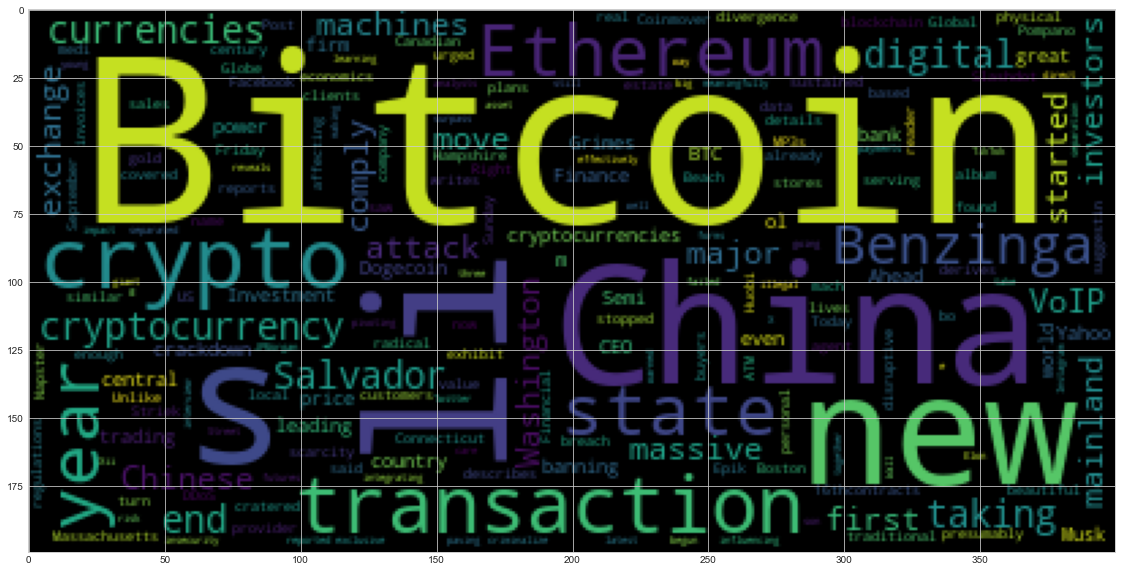

In [71]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_articles_df['Description'].str.cat())
plt.imshow(wc)

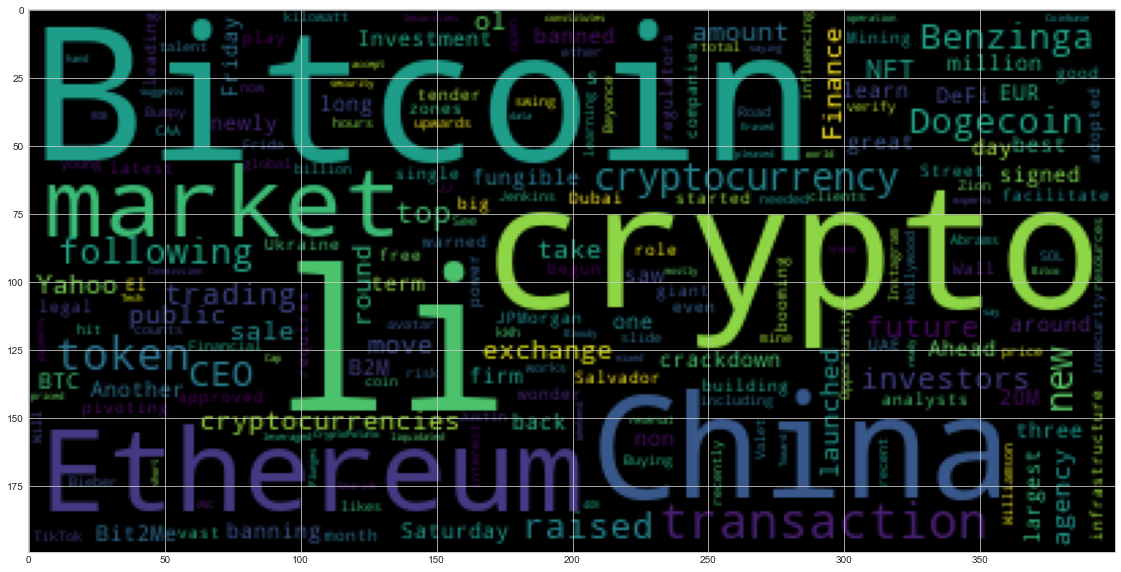

In [72]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_articles_df['Description'].str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [73]:
import spacy
from spacy import displacy

In [74]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [75]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [76]:
# Turn the discriptive column into a list of text:
btc_text = btc_articles_df['Description'].to_list()
btc_text[0]

'Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn of the century. Unlike gold, which derives its value from bo…'

In [77]:
# Concatenate all of the Bitcoin text together
# Turn the discriptive column into a list of text:
for i in range(0, len(btc_text)):
    btc_combined_text = ' '.join(btc_text)

# btc_tokens = tokenizer(btc_combined_text)
print(btc_combined_text)

Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn of the century. Unlike gold, which derives its value from bo… The cryptocurrency-ATM company Coinmover has over 100 machines in stores in Massachusetts, New Hampshire, Connecticut, and Washington state — and plans to have 1,250 machines in 18 states by the end of the year, reports the Boston Globe. 

Right now each mach… Slashdot reader Striek writes: VoIP.ms, a Canadian VoIP provider [also serving the US], has been under a sustained, and presumably massive DDoS attack which started on the September 16th, 2021. The attack has been disruptive enough to be covered by major medi… Chinese cryptocurrency exchange Huobi Global said on Sunday it had stopped taking new mainland customers from Friday and would end contracts with mainland clients by the end of the year to comply with local regulation

In [78]:
print(type(btc_combined_text))

<class 'str'>


In [79]:
# Run the NER processor on all of the text
# Set article to be analyzed with spaCy
doc = nlp(btc_combined_text)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style='ent')


In [80]:
# Add a title to the document
doc.user_data["title"] = "24 Hour Bitcoin Article Entities"

In [81]:
# Render the visualization
displacy.render(doc, style='ent')

In [82]:
# List all Entities
entities = [ent.text for ent in doc.ents]
print(entities)

['the turn of the century', 'ATM', 'Coinmover', 'over 100', 'Massachusetts', 'New Hampshire', 'Connecticut', 'Washington', '1,250', '18', 'the end of the year', 'the Boston Globe', 'Canadian', 'US', 'the September 16th, 2021', 'Chinese', 'Huobi Global', 'Sunday', 'Friday', 'the end of the year', 'Epik', 'Today', 'the Washington Post', 'Pompano Beach', 'State', 'TikTok', 'Instagram', 'China', 'three years', 'Elon Musk', 'Musk', 'China', 'Twitter', '300,000', 'This month', 'BTC', 'El Salvador', 'BTC', 'Dubai', 'Ukraine', 'China', 'China', 'Frida', 'Bitcoin or Ethereum', '1,700 kilowatt hours', 'Bloomberg', 'Two', 'Chinese', 'one', 'first', 'Eswar S Prasad', 'Tolani', 'Terence Eden’s', 'eReader', 'Nook', 'years', 'El Salvador’s', 'Comunidad', 'San Salvador', 'the Urban Centre for Welfare and Oppor', 'China', '>Bitcoin', 'China']


---

### Ethereum NER

In [83]:
# Turn the discriptive column into a list of text:
eth_text = eth_articles_df['Description'].to_list()
eth_text[0]

"Ahead of China's latest bitcoin and crypto crackdown, analysts at Wall Street giant JPMorgan\ufeff have warned big investors have begun pivoting out of bitcoin futures and into ethereum..."

In [84]:
# Concatenate all of the Ethereum text together
# Turn the discriptive column into a list of text:
for i in range(0, len(eth_text)):
    eth_combined_text = ' '.join(eth_text)

print(eth_combined_text)

Ahead of China's latest bitcoin and crypto crackdown, analysts at Wall Street giant JPMorgan﻿ have warned big investors have begun pivoting out of bitcoin futures and into ethereum... This month we had some good news too for BTC, El Salvador started building an infrastructure which would facilitate the BTC as legal tender. UAE is leading the crypto wonder with trading in Dubai free zones approved by the regulators and even Ukraine adopted … The non-fungible token market is booming and these companies could play a role in its future. Mining the top cryptocurrencies such as Bitcoin or Ethereum requires vast amounts of power. A single Bitcoin transaction, including the resources needed to mine the coin and to verify the transaction, can total upwards of 1,700 kilowatt hours (kWh). This ever… Financial insecurity is influencing young investors to take on risk with cryptocurrencies. They're learning how to on TikTok and Instagram. <ol><li>Why Bitcoin, Ethereum And Dogecoin Could Be In For A

In [85]:
print(type(eth_combined_text))

<class 'str'>


In [89]:
# Run the NER processor on all of the text
doc = nlp(eth_combined_text)

# Render NER visualization with displacy to determine entities for extraction (This is done in the next step with a title.)
# displacy.render(doc, style='ent')

# Add a title to the document
doc.user_data["title"] = "24 Hour Ethereum Article Entities"

In [90]:
# Render the visualization
displacy.render(doc, style='ent')

In [91]:
# List all Entities
entities = [ent.text for ent in doc.ents]
print(entities)

['China', 'This month', 'BTC', 'El Salvador', 'BTC', 'Dubai', 'Ukraine', 'Bitcoin or Ethereum', '1,700 kilowatt hours', 'TikTok', 'Instagram', 'China', 'China', 'Frida', 'China', '>Bitcoin', 'China', 'NFT', 'CAA', 'Beyonce', 'Justin Bieber', 'JJ Abrams', 'Zion Williamson', 'Will Jenkins', 'Valet', 'Hollywood', '$1 billion', 'Coinbase', 'the Securities and Exchange Commission', 'AMC', '40', '80B Erased', 'China', 'Friday', 'Bitco', 'Saturday', '43,000', 'Bit2Me', 'Spain', '$20.9 million', '20M EUR', 'Ethereum', 'B2M.', 'three', 'DeFi', 'Indian', 'Bitcoin and Ethereum', 'Friday', 'Saturday', 'Chinese', 'Spanish', 'Bit2Me', '$23.9 million', '20M EUR', 'three', 'B2M.', 'September 6th, 2021', '5.9', 'Evergrande', 'Fed', 'Biden', 'OCC', 'John Cena', 'NFT', 'Crypto', 'a long week', 'Dapper Labs', 'the last seven days', 'NF', 'the past two years', 'DeFi', 'Ethereum', 'second']


---